# Module 5 - Climate feedbacks

In this week's exercises we are looking at climate feedbacks. 

We will use the 2BoxModel to investigate the impact of turning on/off different climate feedbacks. These feedbacks are taken into account in the model via the $\lambda$ parameter and includes:
* Stefan Boltzmann's 'feedback' 
* Lapse rate feedback 
* water vapor feedback 
* Clouds feedback 
* Surface albedo feedback

As in the previous exercise we will use the future forcing scenario RCP8.5 and calculate the temperature change into the future and its sensitivity to the various climate feedbacks.     

In [1]:
# Lese inn relavente python pakker vi ska bruke
import pandas as pd
import matplotlib.pyplot as plt
#%matplotlib notebook # inkluder denne linjen om du vil åpne i Jupyter Notebook og vil lage interaktive plott
%matplotlib inline

from toboks import calculate_temp_anomalies # henter funksjonen som beregner temperaturanomalier basert på toboksmodellen

The future data is stored in the "futureForcing.csv" file. As in the previous exercises we load this into a DataFrame (df). This DataFrame contains the radiative forcing associated with four RCP scenarios. 
As you can see if you print the dataframe each scenario contains a total radiative forcing, and is not separated into contributions from greenhouse gases, solar radiations, volcanic activity, agriculture and aerosols. 
The forcing runs from year 1750 to 2090, i.e. also covering the historical period, which we have looked at so far.  

In [2]:
# les inn historisk data fra filen 'historical.csv'
df=pd.read_csv('futureForcing.csv',index_col = 0,sep=',',encoding = "utf-8")

print('Radiative forcing in W/m2 \n \n', df)

Radiative forcing in W/m2 
 
         RCP2.6  RCP4.5  RCP6.0  RCP8.5
year                                  
1751.0  -0.021  -0.021  -0.021  -0.021
1752.0  -0.023  -0.023  -0.023  -0.023
1753.0  -0.023  -0.023  -0.023  -0.023
1754.0  -0.026  -0.026  -0.026  -0.026
1755.0  -0.027  -0.027  -0.027  -0.027
...        ...     ...     ...     ...
2086.0   2.424   3.752   4.492   6.802
2087.0   2.428   3.759   4.529   6.884
2088.0   2.432   3.766   4.566   6.966
2089.0   2.436   3.773   4.603   7.048
2090.0   2.440   3.780   4.640   7.130

[340 rows x 4 columns]


## Future projections with the 2box model 

Create 6 experiments in total:

* Run#1:'RCP8.5_ctrl', use the radiative forcing from RCP8.5 with **all feedbacks included**. This will be our reference experiment. 

* Run#2-6:'RCP8.5_noPlanck', use the radiative forcing from RCP8.5, but turn off the Stefan Bolzman feedback. Repeat for each feedback, i.e. "RCP8.5_noLapseRate" and so on 

Use the mean values for the feedback parameters from the table <img src="Bilder/table_lambda_values.png" style="width:50%" >. *To turn a feedback off uust set the value to zero*. 

With the TwoBox model calculate the temperature change in year 2090 with the different feedback parameters turned on and off. 

In [3]:
#/RCP8.5_ctrl//////////////////////////////////////////////////////////////////////////////////////////////////////////
                                                                                                                    #//
# Radiative forcing                                                                                                 #//
total_forcing = df['RCP8.5']                                                                                        #//
                                                                                                                    #//                                                                                               #//                                                                                                                 #//
# Deep ocean heat uptake efficency [Wm-2K-1]                                                                        #//                                                                                                   #//
gamma=-0.69  # best guesses [-1 to -0.5]                                                                            #//
                                                                                                                    #//
# konverter dataframe til data-array                                                                                #//
radiative_forcing = total_forcing.to_numpy()                                                                        #//     
                                                                                                                    #//
# feedback parameters                                                                                               #//
lambda_planck=-3.1     # Stefan Boltzmann's 'feedback' [Wm-2K-1] best guesses  [-3.3 to -3.1]                       #//
lambda_lapse=-0.6      # Lapse rate feedback [Wm-2K-1] best guesses [-1.2 to -0.5]                                  #//
lambda_water=1.7       # water vapor feedback [Wm-2K-1] best guesses [1.5 to 2.2]                                   #//
lambda_cloud=0.50      # Clouds feedback [Wm-2K-1] best guesses [0.1 to 1.2]                                        #//
lambda_albedo=0.40     # Surface albedo feedback [Wm-2K-1] best guesses [0.1 to 0.4]                                #//
lambda_other=0.0       # Other feedbacks [Wm-2K-1]                                                                  #//
                                                                                                                    #//
lambda_sum=sum([lambda_planck,                                                                                      #//
    lambda_lapse,                                                                                                   #//
    lambda_water,                                                                                                   #//
    lambda_cloud,                                                                                                   #//
    lambda_albedo,                                                                                                  #//
    lambda_other])                                                                                                  #// 
                                                                                                                    #//
# kaller opp funksjonen som regner ut temperaturendringene                                                          #//
df['Ts_ctrl'], To = calculate_temp_anomalies(radiative_forcing, lambda_sum, gamma)                                  #//
                                                                                                                    #//
# /////////////////////////////////////////////////////////////////////////////////////////////////////////////////////

In [31]:
#/RCP8.5_noPlanck//////////////////////////////////////////////////////////////////////////////////////////////////////   
                                                                                                                    #//
# feedback parameters                                                                                               #//
lambda_planck=-2     # Stefan Boltzmann's 'feedback' [Wm-2K-1] best guesses  [-3.3 to -3.1]                         #//
lambda_lapse=-0.6      # Lapse rate feedback [Wm-2K-1] best guesses [-1.2 to -0.5]                                  #//
lambda_water=1.7       # water vapor feedback [Wm-2K-1] best guesses [1.5 to 2.2]                                   #//
lambda_cloud=0.50      # Clouds feedback [Wm-2K-1] best guesses [0.1 to 1.2]                                        #//
lambda_albedo=0.40     # Surface albedo feedback [Wm-2K-1] best guesses [0.1 to 0.4]                                #//
lambda_other=0.0       # Other feedbacks [Wm-2K-1]                                                                  #//
                                                                                                                    #//
lambda_sum=sum([lambda_planck,                                                                                      #//
    lambda_lapse,                                                                                                   #//
    lambda_water,                                                                                                   #//
    lambda_cloud,                                                                                                   #//
    lambda_albedo,                                                                                                  #//
    lambda_other])                                                                                                  #//
                                                                                                                    #//
# kaller opp funksjonen som regner ut temperaturendringene                                                          #//
df['Ts_noPlanck'], To = calculate_temp_anomalies(radiative_forcing, lambda_sum, gamma)                              #//
                                                                                                                    #//
# /////////////////////////////////////////////////////////////////////////////////////////////////////////////////////

print(lambda_sum)

-1.1102230246251565e-16


In [23]:
#/RCP8.5_noLapseRate///////////////////////////////////////////////////////////////////////////////////////////////////   
                                                                                                                    #//
# feedback parameters                                                                                               #//
lambda_planck=-3.1     # Stefan Boltzmann's 'feedback' [Wm-2K-1] best guesses  [-3.3 to -3.1]                       #//
lambda_lapse=0      # Lapse rate feedback [Wm-2K-1] best guesses [-1.2 to -0.5]                                     #//
lambda_water=1.7       # water vapor feedback [Wm-2K-1] best guesses [1.5 to 2.2]                                   #//
lambda_cloud=0.50      # Clouds feedback [Wm-2K-1] best guesses [0.1 to 1.2]                                        #//
lambda_albedo=0.40     # Surface albedo feedback [Wm-2K-1] best guesses [0.1 to 0.4]                                #//
lambda_other=0.0       # Other feedbacks [Wm-2K-1]                                                                  #//
                                                                                                                    #//
lambda_sum=sum([lambda_planck,                                                                                      #//
    lambda_lapse,                                                                                                   #//
    lambda_water,                                                                                                   #//
    lambda_cloud,                                                                                                   #//
    lambda_albedo,                                                                                                  #//
    lambda_other])                                                                                                  #//
                                                                                                                    #//
# kaller opp funksjonen som regner ut temperaturendringene                                                          #//
df['Ts_noLapseRate'], To = calculate_temp_anomalies(radiative_forcing, lambda_sum, gamma)                           #//
# ///////////////////////////////////////////////////////////////////////////////////////////////////////////////////// 

In [24]:
#/RCP8.5_noWater///////////////////////////////////////////////////////////////////////////////////////////////////////   
                                                                                                                    #//
# feedback parameters                                                                                               #//
lambda_planck=-3.1     # Stefan Boltzmann's 'feedback' [Wm-2K-1] best guesses  [-3.3 to -3.1]                       #//
lambda_lapse=-0.6      # Lapse rate feedback [Wm-2K-1] best guesses [-1.2 to -0.5]                                  #//
lambda_water=0       # water vapor feedback [Wm-2K-1] best guesses [1.5 to 2.2]                                     #//
lambda_cloud=0.50      # Clouds feedback [Wm-2K-1] best guesses [0.1 to 1.2]                                        #//
lambda_albedo=0.40     # Surface albedo feedback [Wm-2K-1] best guesses [0.1 to 0.4]                                #//
lambda_other=0.0       # Other feedbacks [Wm-2K-1]                                                                  #//
                                                                                                                    #//
lambda_sum=sum([lambda_planck,                                                                                      #//
    lambda_lapse,                                                                                                   #//
    lambda_water,                                                                                                   #//
    lambda_cloud,                                                                                                   #//
    lambda_albedo,                                                                                                  #//
    lambda_other])                                                                                                  #//   
                                                                                                                    #//
# kaller opp funksjonen som regner ut temperaturendringene                                                          #//
df['Ts_noWater'], To = calculate_temp_anomalies(radiative_forcing, lambda_sum, gamma)                               #//
# /////////////////////////////////////////////////////////////////////////////////////////////////////////////////////

In [25]:
#/RCP8.5_noCloud///////////////////////////////////////////////////////////////////////////////////////////////////////   
                                                                                                                    #//
# feedback parameters                                                                                               #//
lambda_planck=-3.1     # Stefan Boltzmann's 'feedback' [Wm-2K-1] best guesses  [-3.3 to -3.1]                       #//
lambda_lapse=-0.6      # Lapse rate feedback [Wm-2K-1] best guesses [-1.2 to -0.5]                                  #//
lambda_water=1.7       # water vapor feedback [Wm-2K-1] best guesses [1.5 to 2.2]                                   #//
lambda_cloud=0      # Clouds feedback [Wm-2K-1] best guesses [0.1 to 1.2]                                           #//
lambda_albedo=0.40     # Surface albedo feedback [Wm-2K-1] best guesses [0.1 to 0.4]                                #//
lambda_other=0.0       # Other feedbacks [Wm-2K-1]                                                                  #//
                                                                                                                    #//
lambda_sum=sum([lambda_planck,                                                                                      #//
    lambda_lapse,                                                                                                   #//
    lambda_water,                                                                                                   #//
    lambda_cloud,                                                                                                   #//
    lambda_albedo,                                                                                                  #//
    lambda_other])                                                                                                  #//   
                                                                                                                    #//
# kaller opp funksjonen som regner ut temperaturendringene                                                          #//
df['Ts_noCloud'], To = calculate_temp_anomalies(radiative_forcing, lambda_sum, gamma)                               #//
# /////////////////////////////////////////////////////////////////////////////////////////////////////////////////////

In [26]:
#/RCP8.5_noAlbedo//////////////////////////////////////////////////////////////////////////////////////////////////////
                                                                                                                    #//
# feedback parameters                                                                                               #//
lambda_planck=-3.1     # Stefan Boltzmann's 'feedback' [Wm-2K-1] best guesses  [-3.3 to -3.1]                       #//
lambda_lapse=-0.6      # Lapse rate feedback [Wm-2K-1] best guesses [-1.2 to -0.5]                                  #//
lambda_water=1.7       # water vapor feedback [Wm-2K-1] best guesses [1.5 to 2.2]                                   #//
lambda_cloud=0.50      # Clouds feedback [Wm-2K-1] best guesses [0.1 to 1.2]                                        #//
lambda_albedo=0     # Surface albedo feedback [Wm-2K-1] best guesses [0.1 to 0.4]                                   #//
lambda_other=0.0       # Other feedbacks [Wm-2K-1]                                                                  #//
                                                                                                                    #//
lambda_sum=sum([lambda_planck,                                                                                      #//
    lambda_lapse,                                                                                                   #//
    lambda_water,                                                                                                   #//
    lambda_cloud,                                                                                                   #//
    lambda_albedo,                                                                                                  #//
    lambda_other])                                                                                                  #//   
                                                                                                                    #//
# kaller opp funksjonen som regner ut temperaturendringene                                                          #//
df['Ts_noAlbedo'], To = calculate_temp_anomalies(radiative_forcing, lambda_sum, gamma)                              #//
# /////////////////////////////////////////////////////////////////////////////////////////////////////////////////////


<u>Reminder:</u> 

You can select a time period year1:year2 in a DataFrame by typing **DataFrameName['variable_name'].loc[year1:year2]**

You can compute the mean of the variable for that time period by doing **DataFrameName['variable_name'].loc[year1:year2].mean**

**NewObject = DataFrameName['VariableName']+some operations** will create a new DataFrame 

while  **DataFrameName['VariableName2']=DataFrameName['VariableName']+some  operations** adds one variable/column (with index VariableName2) to the preexisting DataFrame .


Below, we run two loops to 1- compute the temperature anomaly with respect to the period 1986-2005 and 2- print the temperature anomaly at the end of the experiment in 2090.

In [27]:
# This is the old way to compute the temperature anomaly for each experiment. There is a repeating pattern that can be used in a loop. 

# df[dT_Ts_ctrl] =  df[Ts_ctrl]- df[Ts_ctrl].loc[1986:2005].mean()
# df[dT_noPlanck] =  df[Ts_noPlanck]- df[Ts_noPlanck].loc[1986:2005].mean()
# df[dT_noLapseRate] =  df[Ts_noLapseRate]- df[Ts_noLapseRate].loc[1986:2005].mean()
# df[dT_Ts_noWater] =  df[Ts_noWater]- df[Ts_noWater].loc[1986:2005].mean()
# df[dT_Ts_noCloud] =  df[Ts_noCloud]- df[Ts_noCloud].loc[1986:2005].mean()
# df[dT_Ts_noAlbedo] =  df[Ts_noAlbedo]- df[Ts_noAlbedo].loc[1986:2005].mean()

In [28]:
# Sometimes the loop can save time, space and help to avoid mistakes...

# 1st loop: 
namelist = ['Ts_ctrl', 'Ts_noPlanck', 'Ts_noLapseRate', 'Ts_noWater', 'Ts_noCloud' , 'Ts_noAlbedo']

for varname in namelist:
    suffix = varname.split('_')[1]
    newname = 'dT_' + suffix
    print(newname)
    df[newname] =  df[varname]- df[varname].loc[1986:2005].mean() # temp. anomaly


dT_ctrl
dT_noPlanck
dT_noLapseRate
dT_noWater
dT_noCloud
dT_noAlbedo


In [29]:
# 2nd loop:
# selecting the temperature change at one specific year
# below we use the temperature anomalies with respect to 1986-2005
year = 2050

namelist = ['dT_ctrl', 'dT_noPlanck', 'dT_noLapseRate', 'dT_noWater', 'dT_noCloud' , 'dT_noAlbedo']
for i, varname in enumerate(namelist):
    Tloc = df[varname].loc[year]
    print(varname, 'at year', year, ':', "%.2f" %(Tloc),'°C')

dT_ctrl at year 2050 : 1.59 °C
dT_noPlanck at year 2050 : 3.83 °C
dT_noLapseRate at year 2050 : 2.35 °C
dT_noWater at year 2050 : 0.83 °C
dT_noCloud at year 2050 : 1.26 °C
dT_noAlbedo at year 2050 : 1.31 °C


## Questions

### 1 - Test your intuition (before running the model)

* What is the physical meaning of the feedback parameter? HINT: Use the units [$W m^{-2} K^{-1}$] as a guide. 

* What does it mean that a feedback is negative or positive? Explain in your own words.

* For each of the feedback parameters explain their mean effect on climate (i.e. surface temperature) 

* Which feedback factor do you think has the largest impact on the mean temperature?

### 2 - Investigate the impact of feedback parameters on the temperature response using the TwoBox model

* run the experiments #3-6 by copy-pasting the 'RCP8.5_noPlanck' box and changing the feedbacks parameters and the name of the experiment accordingly (noLapseRate, noWater, noCloud, noAlbedo)

* Calculate the temperature change in year 2090 with respect to 1986-2005 for Run#1-6 (you can for example use the first loop by uncommenting the code. Make sure the loop is placed after you defined all the experiments) and use the code below to plot it.

* How does each of the feedback parameters impact the simulated temperature change? What are their relative contributions? 

* How does the results from the simple 2box model compare with your initial guess? 


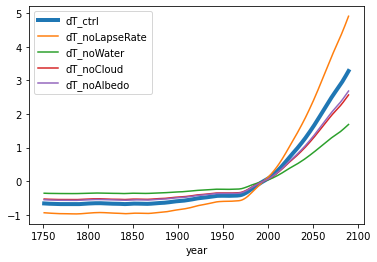

In [30]:
df['dT_ctrl'].plot(linewidth=4)
#df['dT_noPlanck'].plot()
df['dT_noLapseRate'].plot()
df['dT_noWater'].plot()
df['dT_noCloud'].plot()
df['dT_noAlbedo'].plot()
plt.legend(loc='upper left')

### 3 - For further reflection 

* In this simple model the feedback factors are constant in time. Discuss the potential problems with this assumption.

* Can you think of other important feedback mechanisms that are not included in the TwoBox model?